In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Face Shape Finder
 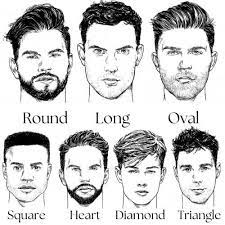

In [13]:
import cv2
import tensorflow as tf
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from scipy import ndimage

In [14]:
train = ImageDataGenerator(rescale=1/255)

In [15]:
train_dataset = train.flow_from_directory('./face shape detector',target_size=(200,200),batch_size=3, class_mode = 'binary')

Found 573 images belonging to 5 classes.


In [16]:
train_dataset.class_indices

{'heart': 0, 'oblong': 1, 'oval': 2, 'round': 3, 'square': 4}

In [17]:
classess = ['heart','oblong','oval','round','square']

# Face shape finder using ANN

In [18]:
ann = models.Sequential([
        layers.Flatten(input_shape=(200,200,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(5, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(train_dataset ,epochs=5)

Epoch 1/5
191/191 [==============================] - 334s 2s/step - loss: 2.5688 - accuracy: 0.2129
Epoch 2/5
191/191 [==============================] - 445s 2s/step - loss: 1.6447 - accuracy: 0.2339
Epoch 3/5
191/191 [==============================] - 360s 2s/step - loss: 1.6266 - accuracy: 0.2007
Epoch 4/5
191/191 [==============================] - 358s 2s/step - loss: 1.6169 - accuracy: 0.2024
Epoch 5/5
191/191 [==============================] - 360s 2s/step - loss: 1.6113 - accuracy: 0.2164


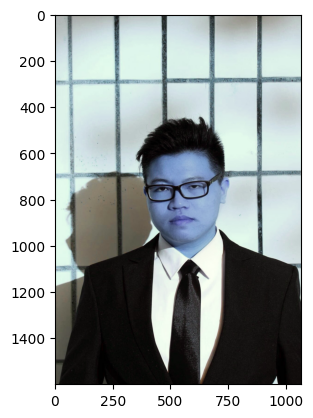

1/1 [==============================] - 0s 284ms/step
0
heart


In [19]:
img = cv2.imread("./test/me_photo.jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = ann.predict(img)
print(np.argmax(classes))
z = (np.argmax(classes))
print(classess[z])

# Face shape finder using CNN

In [20]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(200,200,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(5,activation='softmax'))

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(train_dataset,epochs=10)

Epoch 1/10
191/191 [==============================] - 13s 60ms/step - loss: 1.6170 - accuracy: 0.1815
Epoch 2/10
191/191 [==============================] - 10s 53ms/step - loss: 1.6121 - accuracy: 0.2077
Epoch 3/10
191/191 [==============================] - 11s 58ms/step - loss: 1.6023 - accuracy: 0.2286
Epoch 4/10
191/191 [==============================] - 9s 48ms/step - loss: 1.5601 - accuracy: 0.2880
Epoch 5/10
191/191 [==============================] - 9s 46ms/step - loss: 1.5102 - accuracy: 0.3403
Epoch 6/10
191/191 [==============================] - 10s 50ms/step - loss: 1.4619 - accuracy: 0.3630
Epoch 7/10
191/191 [==============================] - 8s 43ms/step - loss: 1.4153 - accuracy: 0.4398
Epoch 8/10
191/191 [==============================] - 8s 44ms/step - loss: 1.3455 - accuracy: 0.4485
Epoch 9/10
191/191 [==============================] - 9s 47ms/step - loss: 1.2579 - accuracy: 0.4974
Epoch 10/10
191/191 [==============================] - 10s 52ms/step - loss: 1.1553 - a

In [42]:
cnn.save('face-shape-finder', overwrite=True)

INFO:tensorflow:Assets written to: face-shape-finder/assets


INFO:tensorflow:Assets written to: face-shape-finder/assets


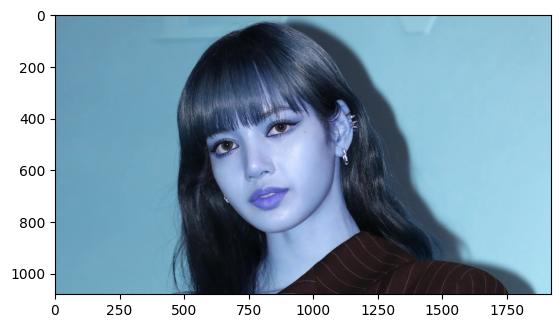

1/1 [==============================] - 0s 85ms/step
1
oblong


In [34]:
img = cv2.imread("./test/lisa.jpeg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(np.argmax(classes))
print(classess[z])

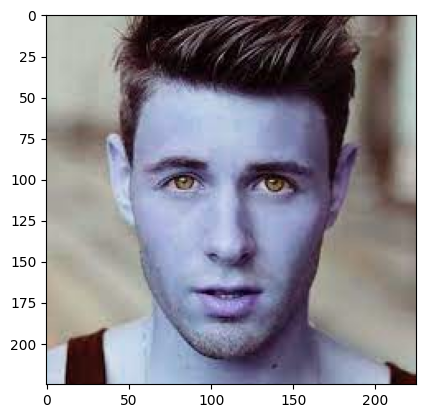

1/1 [==============================] - 0s 32ms/step
oblong


In [32]:
img = cv2.imread("./face shape detector/oval/download (1).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
z = (np.argmax(classes))
print(classess[z])

In [35]:
classess = ['heart','oblong','oval','round','square']

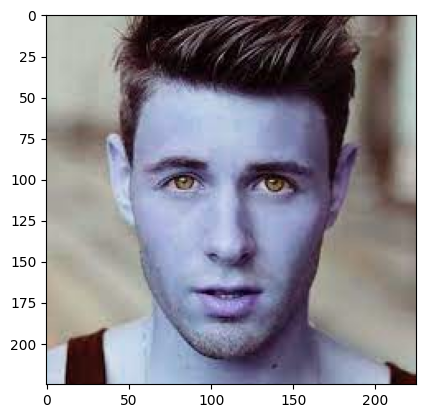

1/1 [==============================] - 0s 46ms/step
oval


In [36]:
img = cv2.imread("./face shape detector/oval/download (1).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
z = (np.argmax(classes))
print(classess[z])

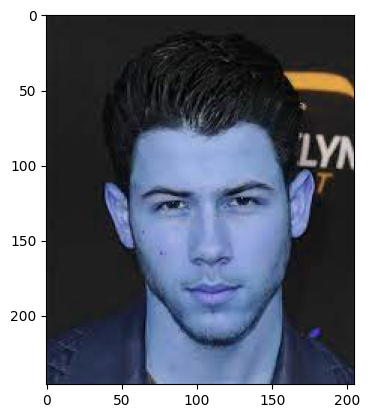

1/1 [==============================] - 0s 30ms/step
[[9.9997318e-01 0.0000000e+00 0.0000000e+00 2.6865955e-05 0.0000000e+00]]
0
heart


In [37]:
img = cv2.imread("./face shape detector/heart/download (9).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(classes)
z = (np.argmax(classes))
print(z)
print(classess[z])

In [38]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [39]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

<Axes: ylabel='count'>

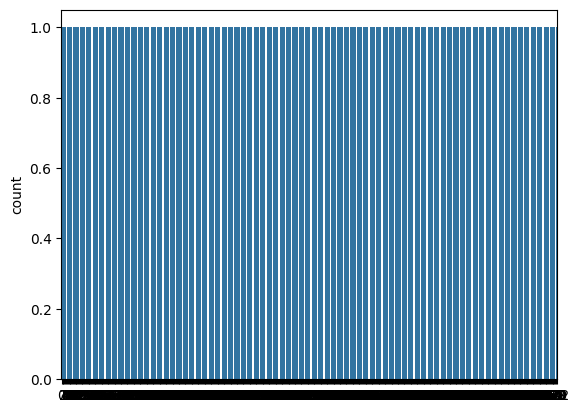

In [40]:
sns.countplot(train_dataset.classes)